In [2]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy

ModuleNotFoundError: No module named 'igraph'

In [1]:
g2 = ig.Graph.Read_GML("himalaisci.gml")

NameError: name 'ig' is not defined

In [5]:
components = g2.components()

In [6]:
glownaskladowa = components.subgraphs()[0]

In [7]:
# Podgraf do obliczeń
himal = glownaskladowa.subgraph(glownaskladowa.vs[:2000])

In [17]:
print(len(himal.es))

1717


In [85]:
def rozklad_wielkosci_grup(grupy):
    tab = []
    for grupa in grupy:
        if len(grupa) >= 3:
            tab.append(len(grupa))
    plt.hist(tab,color='skyblue', bins=95)
    plt.xlim(0, 200)
    plt.ylim(0, 70)
    plt.xlabel("Rozmiar społeczności")
    plt.ylabel("Liczba grup")
    plt.title("Rozkład wielkości społeczności")
    plt.tight_layout()
    plt.show()
    

In [114]:
def avg_clustering(g, clusters):
    result = []
    for group in clusters:
        grupa = g.subgraph(group)
        if grupa.vcount() >= 3 and grupa.ecount() > 0:
            wynik = grupa.transitivity_avglocal_undirected()
            # if not np.isnan(wynik):
            result.append(wynik)
    return result


In [23]:
Louvain  = himal.community_multilevel()

In [120]:
# Etykieta każdej społeczności przypisana do wierzchołków
himal.vs["communitylou"] = Louvain.membership

In [8]:
print(himal.vs["community"])

[0, 1, 2, 3, 4, 5, 6, 3, 7, 8, 0, 9, 10, 11, 0, 12, 12, 13, 14, 6, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 12, 37, 27, 38, 39, 6, 40, 41, 42, 43, 44, 45, 46, 13, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 6, 62, 6, 63, 64, 0, 65, 66, 8, 67, 68, 69, 70, 71, 6, 72, 73, 74, 6, 75, 22, 76, 77, 78, 79, 22, 80, 6, 4, 6, 81, 64, 82, 8, 64, 64, 83, 84, 85, 86, 87, 88, 12, 89, 90, 91, 92, 93, 12, 94, 95, 96, 97, 0, 12, 98, 8, 22, 99, 100, 101, 102, 103, 104, 12, 9, 105, 106, 12, 107, 108, 109, 9, 110, 6, 6, 6, 111, 112, 6, 113, 6, 114, 115, 116, 0, 64, 117, 118, 119, 12, 22, 6, 120, 4, 121, 94, 122, 123, 6, 6, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 22, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 8, 117, 149, 150, 151, 152, 94, 153, 154, 155, 9, 156, 157, 158, 4, 159, 160, 161, 162, 163, 3, 164, 165, 166, 25, 167, 168, 8, 169, 6, 170, 117, 77, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [25]:
etykiety = himal.community_label_propagation()

In [92]:

himal.vs["communityety"] = etykiety.membership

In [30]:
do_gnkon = himal.components().subgraphs()[0]

In [31]:
print(len(do_gnkon.vs))
print(len(himal.vs))

582
2000


In [32]:
Gnkom = himal.community_edge_betweenness()
# robiłem obliczenia na cąłym grafie i nwet nie zauważyłem xdd

In [93]:
Gnkom_clusters = Gnkom.as_clustering()

In [121]:
himal.vs["communitygn"] = Gnkom_clusters.membership

In [115]:
hitagn = avg_clustering(himal, Gnkom_clusters)
hitalou = avg_clustering(himal, Louvain)
hitalet = avg_clustering(himal, etykiety)

In [117]:
print(f"Girvan–Newman: współ grupowania: {hitagn}")
print(f"Louvain: współ grupowania: {hitalou}")
print(f"Label: współ grupowania: {hitalet}")

Girvan–Newman: współ grupowania: [0.6686666666666665, 0.7777777777777777, 0.8022904539901822, 0.13703703703703704, 0.6791767616698237, 0.7772108843537415, 0.5723947550034506, 1.0, 0.6, 0.7760233918128655, 0.5888888888888889, 1.0, 0.5, 0.6952614379084968, 0.6333333333333334, 0.6425925925925925, 0.798015873015873, 0.9199999999999999, 0.7022222222222222, 0.6278030303030303, 1.0, 0.8333333333333333, 0.6101349630761396, 0.582051282051282, 0.7777777777777778, 0.8666666666666668, 1.0, 0.8571428571428572, 1.0, 0.5888888888888889, 0.0, 1.0, 1.0, 0.9404761904761904, 0.0, 1.0, 1.0, 0.0, 0.0, 0.625, 1.0, 1.0, 0.648148148148148, 0.0, 1.0, 0.875, 0.6011904761904762, 0.0, 1.0, 0.75, 1.0, 0.0, 0.7, 0.2333333333333333, 0.0, 1.0, 0.0, 0.4666666666666666, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.8666666666666666, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Louvain: współ grupowania: [0.7021739130434782, 0.7777777777777777, 0.6098264054785794, 0.13703703703703704, 0.7336366010451595, 0.806219362745098, 

In [118]:
print(f"Liczba społeczności i Girvan–Newman: {len(Gnkom_clusters)}, {Gnkom_clusters.modularity}")
print(f"Liczba społeczności i Louvain: {len(Louvain)}, {Louvain.modularity}")
print(f"Liczba społeczności i Label: {len(etykiety)}, {etykiety.modularity}")

Liczba społeczności i Girvan–Newman: 1146, 0.7799097991953363
Liczba społeczności i Louvain: 1133, 0.7991678677271891
Liczba społeczności i Label: 1160, 0.7579564253317933


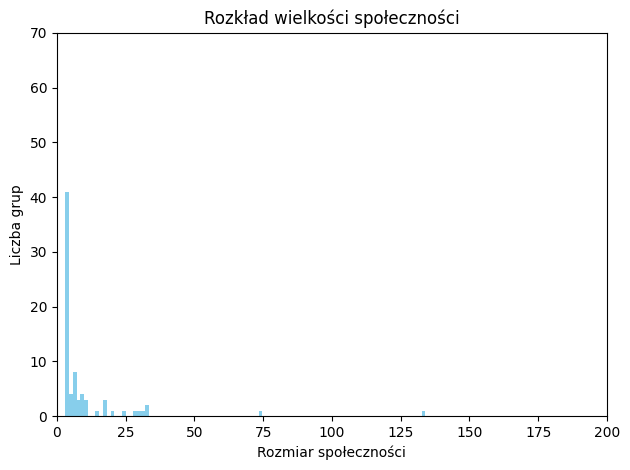

In [86]:
rozklad_wielkosci_grup(Gnkom_clusters)

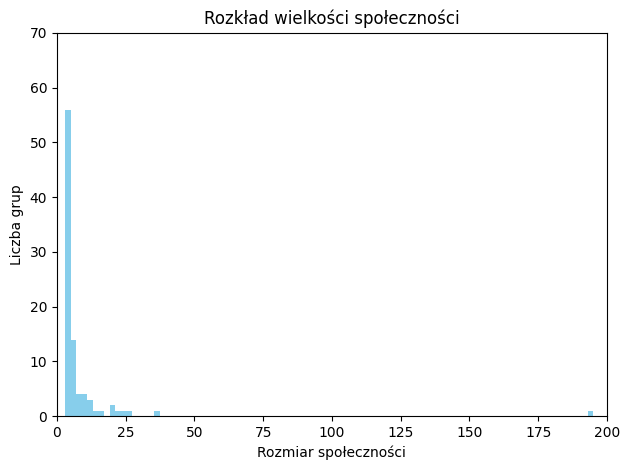

In [87]:
rozklad_wielkosci_grup(etykiety)

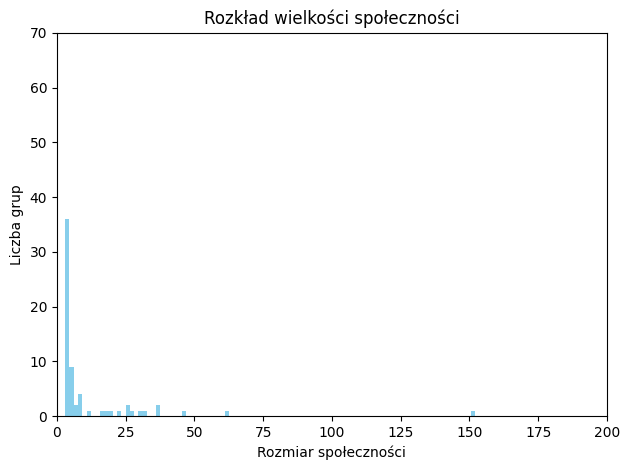

In [88]:
rozklad_wielkosci_grup(Louvain)

In [119]:
himal_nx = himal.to_networkx()

In [122]:
for v in himal.vs:
    himal_nx.nodes[v.index]["communityety"] = v["communityety"]
    himal_nx.nodes[v.index]["communitygn"] = v["communitygn"]
    himal_nx.nodes[v.index]["communitylou"] = v["communitylou"]

In [151]:
def rysowanie_wykresow(w, x):

    group_sizes = {}
    
    for _, data in himal_nx.nodes(data=True):
        g = data[w]
        if g in group_sizes:
            group_sizes[g] += 1
        else:
            group_sizes[g] = 1

    top5 = sorted(group_sizes.items(), key=lambda z: z[1], reverse=True)[:5]
    for group_id, size in top5:
        print(f"Grupa {group_id}: {size} wierzchołków")
        
    # 2. Nadaj nową grupę tylko jeśli rozmiar > 3, inaczej 0
    for _, data in himal_nx.nodes(data=True):
        g = data[w]
        if group_sizes[g] > 3:
            data["group_filtered"] = g
        else:
            data["group_filtered"] = 0
    
    groups = [data["group_filtered"] for node, data in himal_nx.nodes(data=True)]
    num_groups = len(set(groups))
    
    cmap = plt.get_cmap("tab20", num_groups)
    colors = [cmap(group) for group in groups]
    
    pos = nx.spring_layout(himal_nx, seed=42)
    
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(himal_nx, pos, node_color=colors, node_size=100)
    nx.draw_networkx_edges(himal_nx, pos, alpha=0.3)
    nx.draw_networkx_labels(himal_nx, pos, labels=nx.get_node_attributes(himal_nx, w), font_size=8)
    
    plt.axis("off")
    plt.xlabel("0 to grupa co niespełnia wymagań")
    plt.title(f"Społeczności z igraph {x} zwizualizowane w NetworkX")
    
    plt.tight_layout()
    plt.show()


In [152]:
lista = ["communitylou", "communityety", "communitygn"]
lista2 = ["Louvain", "Etykiety", "GN"]

Grupa 6: 152 wierzchołków
Grupa 23: 62 wierzchołków
Grupa 118: 46 wierzchołków
Grupa 9: 36 wierzchołków
Grupa 95: 36 wierzchołków


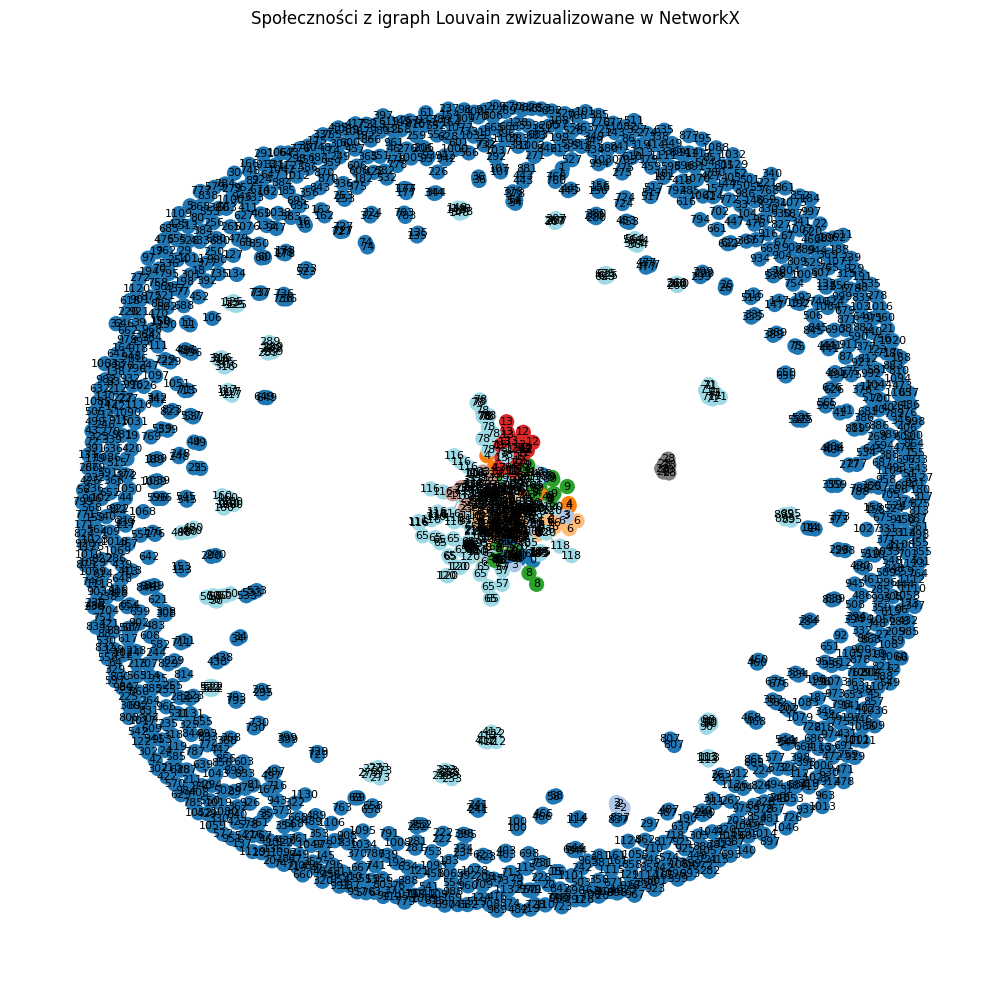

In [153]:
rysowanie_wykresow(lista[0], lista2[0])

Grupa 6: 195 wierzchołków
Grupa 123: 36 wierzchołków
Grupa 0: 26 wierzchołków
Grupa 21: 25 wierzchołków
Grupa 113: 22 wierzchołków


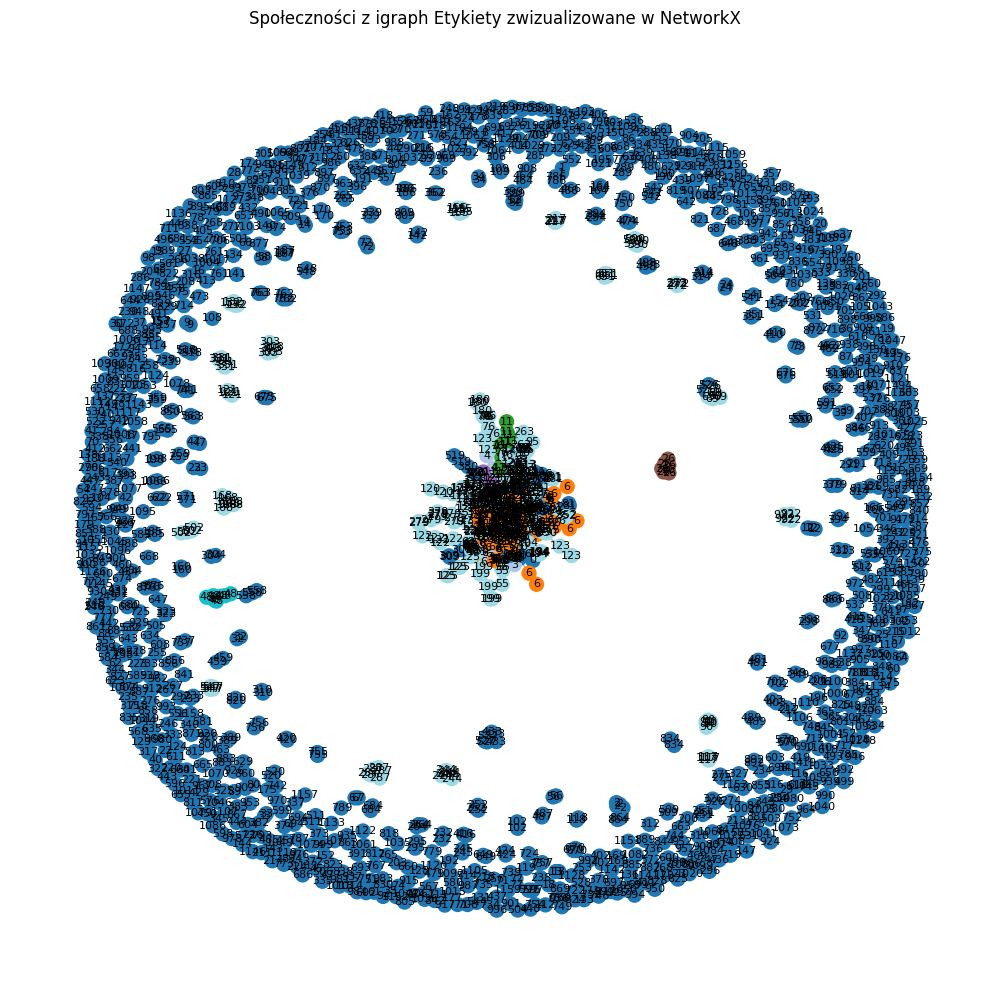

In [154]:
rysowanie_wykresow(lista[1], lista2[1])

Grupa 3: 134 wierzchołków
Grupa 7: 74 wierzchołków
Grupa 11: 32 wierzchołków
Grupa 110: 32 wierzchołków
Grupa 117: 31 wierzchołków


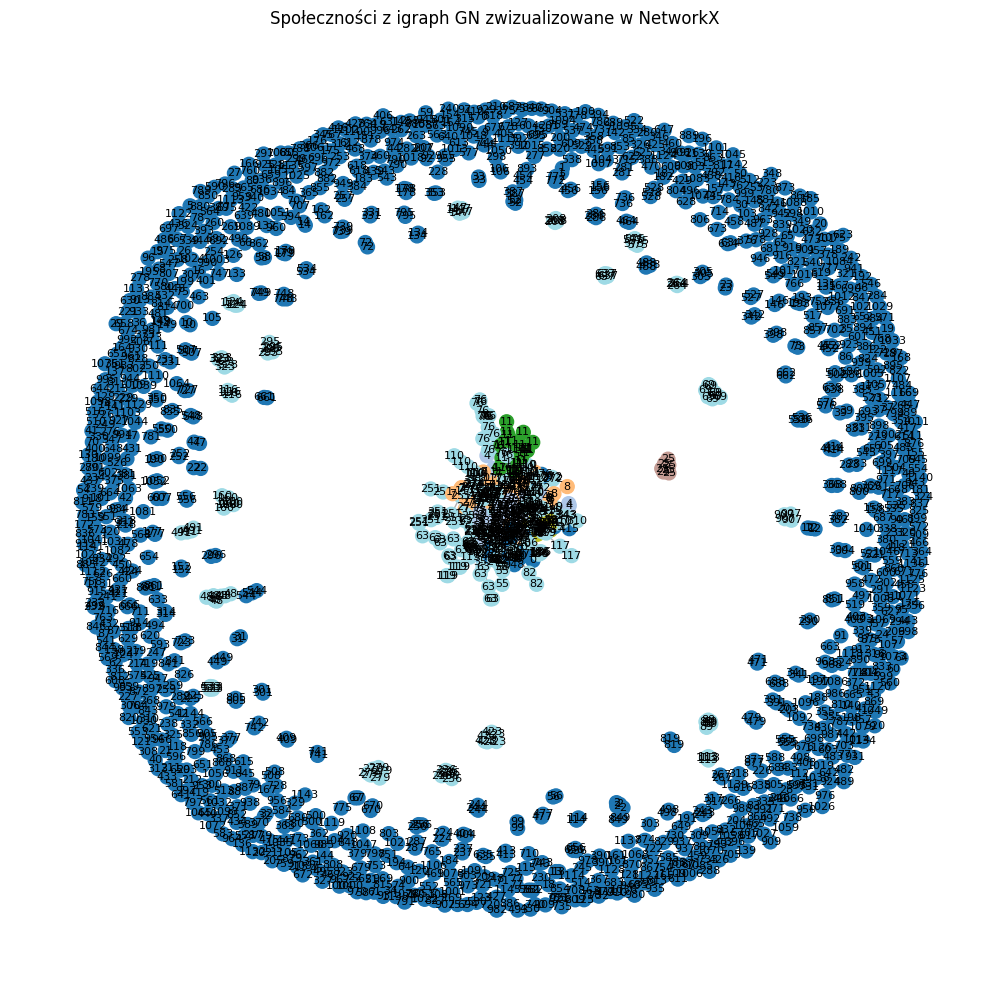

In [155]:
rysowanie_wykresow(lista[2], lista2[2])